In [18]:
from src.DigitalTwin import City, Website
import seaborn as sns
import pandas as pd

In [67]:
city=City(population=10000,average_age=30)
potential_clients=city.get_people(15*6)
web=Website(potential_clients)
exp=web.experiment()

In [68]:
df=pd.DataFrame({
    'group': [k for k in list(exp.keys())],
    'ctr':[k['result'].sum()/k['result'].count() for k in list(exp.values())],
})
color_map = {grp: 'red' if grp in ['a', 'b', 'c'] else 'blue' for grp in df['group']}

<Axes: xlabel='group', ylabel='ctr'>

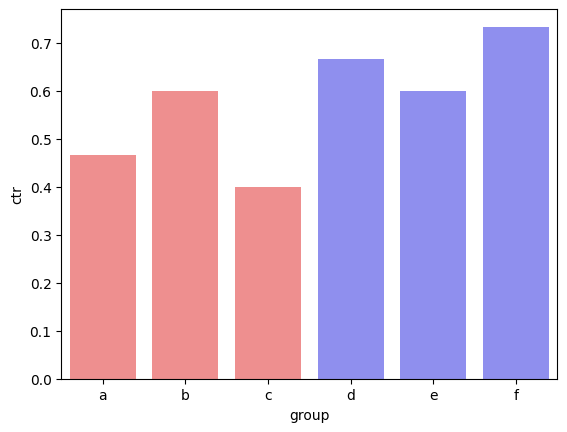

In [69]:
sns.barplot(df,x='group', y='ctr',palette=color_map, hue='group',alpha=0.5)

In [70]:
from src.DigitalTwin import Metrics,Statistics
from matplotlib import pyplot as plt

In [71]:
metric=Metrics(df)

Text(0.5, 0.98, 'CTR for three groups')

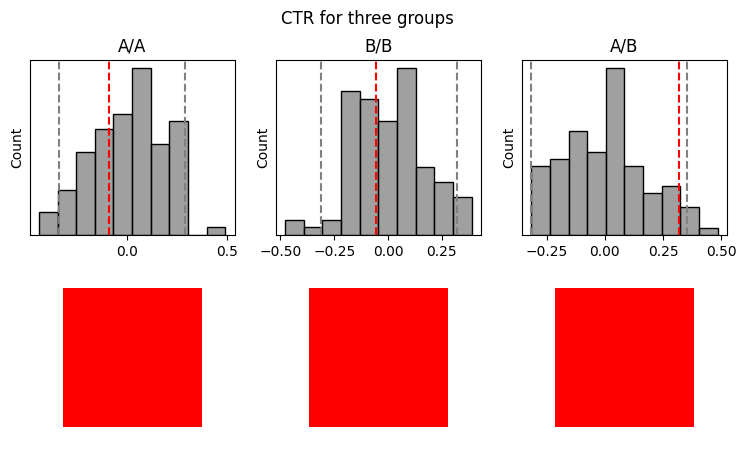

In [72]:

fig, axs = plt.subplots(2, 3, figsize=(3 * 3, 5))

stat=metric.bootstrap(exp['a']['result'],exp['c']['result'])
bs=Statistics(dict(ctr=dict(condition=stat[0], effect=stat[1], hist=stat[2])))
bs.show(ttest=False, fig=fig, axs=axs[:,0])
axs[0,0].set_title('A/A')

stat=metric.bootstrap(exp['d']['result'],exp['e']['result'])
bs=Statistics(dict(ctr=dict(condition=stat[0], effect=stat[1], hist=stat[2])))
bs.show(ttest=False,fig=fig, axs=axs[:,1])
axs[0,1].set_title('B/B')

stat=metric.bootstrap(exp['c']['result'],exp['f']['result'])
bs=Statistics(dict(ctr=dict(condition=stat[0], effect=stat[1], hist=stat[2])))
bs.show(ttest=False,fig=fig, axs=axs[:,2])
axs[0,2].set_title('A/B')

fig.suptitle('CTR for three groups')

In [50]:
bs.effect

[np.float64(0.256)]

---

In [66]:
import statsmodels.stats.api as sms

# Baseline conversion rate (e.g., control group)
p1 = 0.40  
# Minimum detectable effect as expected uplift in treatment group
p2= 0.2

# Calculate effect size
effect_size = sms.proportion_effectsize(p1, p2)

print(effect_size)
# Desired statistical power and significance level
power = 0.80    # 80% power
alpha = 0.05    # 5% significance level

# Calculate required sample size per group
sample_size_per_group = sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha, ratio=1)

print(f"Required sample size per group: {int(sample_size_per_group)}")


0.4421431880029537
Required sample size per group: 80
